We find the Pick up/Drop off Peak and off-Peak hours by grouping the data by hour,from midnight(represented by 0) to 11 p.m.(represented by 23).

/Users/pairtubby/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


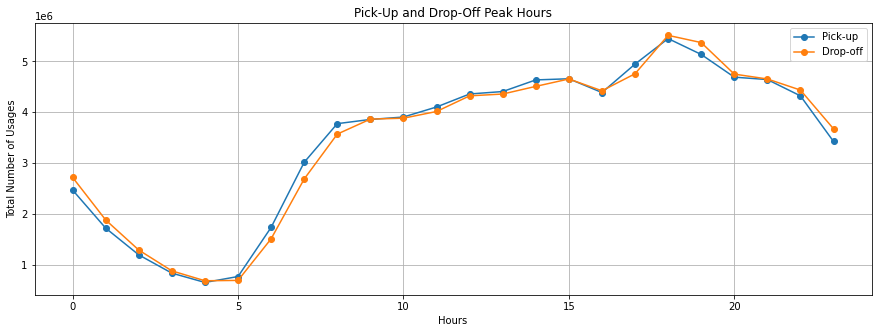

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
count_PU = []
count_DO =[]
for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    filename = 'yellow_tripdata_2019-'+ month +'.csv'
    with open(filename) as csvfile:
        df =pd.read_csv(filename)
        df =df.drop(['VendorID','congestion_surcharge','store_and_fwd_flag','payment_type','fare_amount','extra','mta_tax','tip_amount','improvement_surcharge'],axis =1)
        dt_PU = pd.to_datetime(df['tpep_pickup_datetime'])
        dt_DO = pd.to_datetime(df['tpep_dropoff_datetime'])
        df['tpep_pickup_datetime'] =dt_PU
        df['tpep_dropoff_datetime'] = dt_DO
        df['pickup']=df['tpep_pickup_datetime']
        diff= (dt_DO-dt_PU)
        df['time_length_minute']=(diff.dt.seconds)/60.0
        df =df.drop(['passenger_count','RatecodeID'],axis =1)
        dq = df.groupby([dt_PU.dt.hour]).size().reset_index(name='counts')
        dz = df.groupby([dt_DO.dt.hour]).size().reset_index(name='counts')
        dq = dq.rename(columns={'tpep_pickup_datetime':'hours'})
        dz = dz.rename(columns={'tpep_pickup_datetime': 'hours'})
        count_PU.append(dq['counts'].tolist())
        count_DO.append(dz['counts'].tolist())
#print(count_PU)
#print(count_DO)
a = [sum(i) for i in zip(*count_PU)]
b = [sum(i) for i in zip(*count_DO)]
h = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
#print(a)
#print(b)
df_plot = pd.DataFrame(list(zip(a, b,h)),columns =['Pick-up', 'Drop-off','Hours'])
#print(df_plot)
template = pd.DataFrame(["{0:0=2d}".format(x) for x in range(0, 24)], columns=["Hours"])
ax = df_plot.plot(x='Hours', y=['Pick-up','Drop-off'], kind='line', style="-o", figsize=(15, 5),grid = True)
ax.set_title("Pick-Up and Drop-Off Peak Hours")
ax.set_ylabel("Total Number of Usages")
plt.show()


 

We find the most pick-up and drop-off zones by counting the appearence of LocationID in the data and sort them out.
PU_allstar and DO_allstar are nested lists showing each month's top 5 places.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import shapefile
plt.style.use('ggplot')
import numpy as np
from itertools import chain
from collections import Counter
PU_allstar =[]
DO_allstar =[]

for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    filename = 'yellow_tripdata_2019-'+ month +'.csv'
    with open(filename) as csvfile:
        df =pd.read_csv(filename)
        #print(df.head())
        df =df.drop(['VendorID','congestion_surcharge','store_and_fwd_flag','payment_type','fare_amount','extra','mta_tax','tip_amount','improvement_surcharge'],axis =1)
        PU_location = df['PULocationID']
        DO_location = df['DOLocationID']
        PU_count = df['PULocationID'].value_counts().sort_values()
        DO_count = df['DOLocationID'].value_counts().sort_values()
        dq = pd.DataFrame()
        dq['PUcount'] =PU_count
        dq['DOcount'] = DO_count
        dq.reset_index(inplace=True)
        dq.rename(columns={'index':'LocationID'}, inplace=True)
        PUtop5 = dq.sort_values(by = ['PUcount'], ascending=False).head(5)
        PU_TOP = PUtop5.LocationID.tolist()
        PU_allstar.append(PU_TOP)
        DOtop5 = dq.sort_values(by=['DOcount'], ascending=False).head(5)
        DO_TOP = DOtop5.LocationID.tolist()
        DO_allstar.append(DO_TOP)

print(PU_allstar)
print(DO_allstar)

/Users/pairtubby/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[[237, 236, 161, 162, 230], [237, 161, 236, 162, 186], [161, 237, 162, 236, 230], [237, 161, 236, 162, 186], [237, 236, 161, 162, 186], [237, 161, 236, 162, 186], [161, 237, 186, 162, 132], [161, 186, 132, 162, 237], [237, 236, 161, 186, 132], [237, 161, 236, 162, 186], [237, 161, 236, 186, 230], [237, 236, 161, 186, 162]]
[[236, 237, 161, 170, 162], [236, 161, 237, 170, 162], [161, 236, 237, 170, 230], [236, 237, 161, 170, 230], [236, 237, 161, 230, 170], [236, 161, 237, 170, 230], [161, 236, 237, 230, 170], [161, 230, 237, 170, 236], [236, 237, 161, 170, 230], [236, 237, 161, 170, 230], [236, 237, 161, 230, 170], [236, 237, 161, 230, 162]]


from each month we look at those places and then count the occurrance of the places over 12 months 

In [9]:

a = list(chain.from_iterable(PU_allstar))
PUcount=dict(Counter(a))
print(PUcount)
b = list(chain.from_iterable(DO_allstar))
DOcount = dict(Counter(b))
print(DOcount)
draw_PU_count= list(Counter(a).values())
draw_PU =list(Counter(a).keys())
draw_DO_count= list(Counter(b).values())
draw_DO =list(Counter(b).keys())

{237: 12, 236: 10, 161: 12, 162: 10, 230: 3, 186: 10, 132: 3}
{236: 12, 237: 12, 161: 12, 170: 11, 162: 3, 230: 10}


Prepare shapefile data to plot the map

In [4]:
sf = shapefile.Reader("taxi_zones.shp")
fields_name = [field[0] for field in sf.fields[1:]]
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))


In [ ]:
#pip install shapely


In [ ]:
#pip install descartes

In [5]:
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch
import matplotlib as mpl

function to draw map

In [6]:
def draw_zone_map(ax, sf, heat={}, text=[], arrows=[]):
    continent = [235/256, 151/256, 78/256]
    ocean = (89/256, 171/256, 227/256)
    theta = np.linspace(0, 2*np.pi, len(text)+1).tolist()
    ax.set_facecolor(ocean)
    
    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=(min(heat.values())-1),vmax=max(heat.values())) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
        cm=plt.get_cmap('Reds')
        sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
        sm.set_array([])
        plt.colorbar(sm, ticks=np.linspace((min(heat.values())-1),max(heat.values()),8),
                     boundaries=np.arange((min(heat.values())-1)-10,max(heat.values())+10,.1))
    
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]
        zone = rec[shp_dic['zone']]
        
        if len(heat) == 0:
            col = continent
        else:
            if loc_id not in heat:
                R,G,B,A = cm(norm(0))
            else:
                R,G,B,A = cm(norm(heat[loc_id]))
            col = [R,G,B]

        nparts = len(shape.parts)
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: 
            for ip in range(nparts): 
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
                ax.add_patch(patch)
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2
        if (len(text) == 0 and rec[shp_dic['Shape_Area']] > 0.0001):
            plt.text(x, y, str(loc_id), horizontalalignment='left', verticalalignment='left')            
        elif len(text) != 0 and loc_id in text:
            ax.annotate("[{}] {}".format(loc_id, zone), xy=(x, y), xytext=(x-10000, y-100),color="white", fontsize=9,horizontalalignment='right', verticalalignment='top',bbox=dict(pad=0,fc='black',alpha=0.5))
    

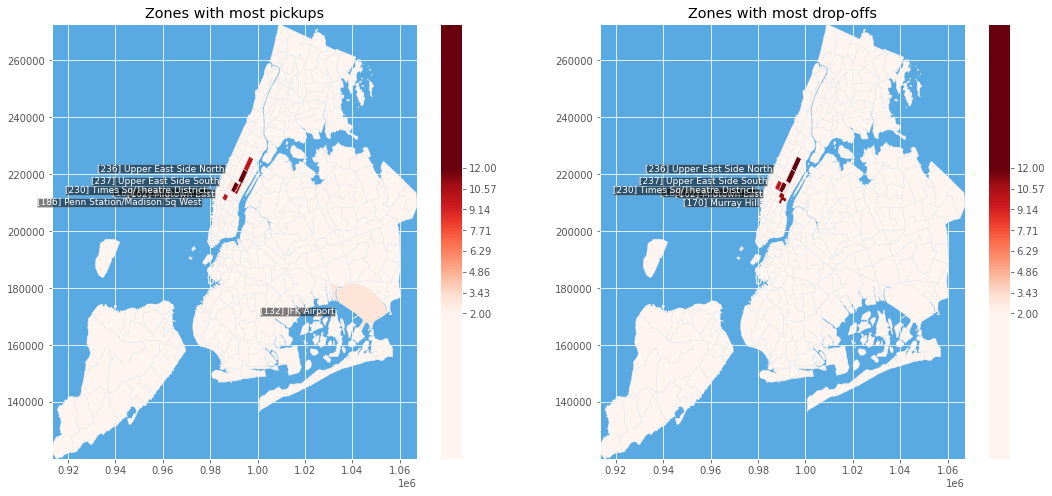

In [8]:
sf = shapefile.Reader("taxi_zones.shp")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
ax = plt.subplot(1, 2, 1)
ax.set_title("Zones with most pickups")
draw_zone_map(ax, sf, heat=PUcount, text=draw_PU)
ax = plt.subplot(1, 2, 2)
ax.set_title("Zones with most drop-offs")
draw_zone_map(ax, sf, heat=DOcount, text=draw_DO)


In [8]:
!pip install descartes

In [7]:
!pip install shapely

In [6]:
!pip install pyshp

In [2]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import random
import itertools
import math
import shapefile
import shapely
from descartes.patch import PolygonPatch
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
def plt_clock(ax, radii, title, color):
    N = 24
    bottom = 2

    # create theta for 24 hours
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)


    # width of each bin on the plot
    width = (2*np.pi*0.95) / N
    
    bars = ax.bar(theta, radii, width=width, bottom=bottom, color=color, edgecolor="#999999")

    # set the lable go clockwise and start from the top
    ax.set_theta_zero_location("N")
    # clockwise
    ax.set_theta_direction(-1)

    # set the label
    ax.set_xticks(theta)
    ticks = ["{}:00".format(x) for x in range(24)]
    ax.set_xticklabels(ticks)
    ax.set_title(title)


In [4]:
def get_lat_lon(sf):
    content = []
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2
        
        content.append((loc_id, x, y))
    return pd.DataFrame(content, columns=["LocationID", "longitude", "latitude"])


In [5]:
def diff_short_long_trip_on_time():
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,18))

    ax = plt.subplot(2,2,1, polar=True)
    # make the histogram that bined on 24 hour
    radii = np.array(df_q3_PU['short trips'].tolist(), dtype="int64")
    title = "Pickup Time for Short Trips"
    plt_clock(ax, radii, title, "#2137cc")

    ax = plt.subplot(2,2,3, polar=True)
    # make the histogram that bined on 24 hour
    radii = np.array(df_q3_PU['long trips'].tolist(), dtype="int64")
    title = "Pickup Time for Long Trips"
    plt_clock(ax, radii, title, "#a60202")

    ax = plt.subplot(2,2,2, polar=True)
    # make the histogram that bined on 24 hour
    radii = np.array(df_q3_DO['short trips'].tolist(), dtype="int64")
    title = "Dropoff Time for Short Trips"
    plt_clock(ax, radii, title, "#2137cc")

    ax = plt.subplot(2,2,4, polar=True)
    # make the histogram that bined on 24 hour
    radii = np.array(df_q3_DO['long trips'].tolist(), dtype="int64")
    title = "Dropoff Time for Long Trips"
    plt_clock(ax, radii, title, "#a60202")


In [10]:
from sqlalchemy import create_engine


nyc_database = create_engine('sqlite:///nyc_database.db')


In [11]:
for month in [12]: # Visualization of the december month alone
    urllib.request.urlretrieve("https://s3.amazonaws.com/nyc-tlc/trip+data/"+ \
                               "yellow_tripdata_2019-{0:0=2d}.csv".format(month), 
                               "nyc.2019-{0:0=2d}.csv".format(month))

# Download the location Data
urllib.request.urlretrieve("https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip", "taxi_zones.zip")
with zipfile.ZipFile("taxi_zones.zip","r") as zip_ref:
    zip_ref.extractall("./shape")

In [43]:
df = pd.read_csv("nyc.2019-12.csv", nrows=10)
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-12-01 00:26:58,2019-12-01 00:41:45,1,4.2,1,N,142,116,2,14.5,3.0,0.5,0.0,0,0.3,18.3,2.5
1,1,2019-12-01 00:12:08,2019-12-01 00:12:14,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.0,0,0.3,3.8,0.0
2,1,2019-12-01 00:25:53,2019-12-01 00:26:04,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.0,0,0.3,3.8,0.0
3,1,2019-12-01 00:12:03,2019-12-01 00:33:19,2,9.4,1,N,138,25,1,28.5,0.5,0.5,10.0,0,0.3,39.8,0.0
4,1,2019-12-01 00:05:27,2019-12-01 00:16:32,2,1.6,1,N,161,237,2,9.0,3.0,0.5,0.0,0,0.3,12.8,2.5


In [13]:
j, chunksize = 1, 100000
for month in [12]:
    fp = "nyc.2019-{0:0=2d}.csv".format(month)
    #df['pickup_month'] = df['PULocationID']*0
    # print(fp)
    for df1 in pd.read_csv(fp, chunksize=chunksize, iterator=True):
        
        df1 = df1.rename(columns={c: c.replace(' ', '_') for c in df1.columns})
        # a = [m[5:7] for m in df1['tpep_pickup_datetime'] if(m[5].isnumeric() and m[6].isnumeric())]
        df1['pickup_dt'] = [m[8:10] for m in df1['tpep_pickup_datetime']]
        df1['pickup_month'] = [n[5:7] for n in df1['tpep_pickup_datetime']]
        df1['pickup_hour'] = [x1[11:13] for x1 in df1['tpep_pickup_datetime']]
        df1['dropoff_dt'] = [o[8:10] for o in df1['tpep_dropoff_datetime']]
        df1['trip_distance'] = df1['trip_distance']
        
        
        t1 = pd.to_datetime(df1['tpep_pickup_datetime'])
        # t1 = df1['tpep_pickup_datetime']
        t2 = pd.to_datetime(df1['tpep_dropoff_datetime'])
        df1['time'] = ((t2-t1).dt.total_seconds()/3600).to_frame()
        #print((t2-t1).dt.total_seconds())
        # t2 = df1['tpep_dropoff_datetime']
        df1['speed'] = (df1['trip_distance']/((t2-t1).dt.total_seconds())/3600)
        df1['dropoff_hour'] = [x[11:13] for x in df1['tpep_dropoff_datetime']]
        df1.index += j
        # print(df1.index)
        df1.to_sql('table_record', nyc_database, if_exists='append')
        j = df1.index[-1] + 1
del df1


C:\Users\sidda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
df_q3_short_dec1 = pd.read_sql_query('SELECT pickup_hour AS PUtime, \
                                 count(*) AS count, sum(trip_distance)/sum(time) as speed \
                                 FROM table_record_dec \
                                 WHERE trip_distance < 30 \
                                 GROUP BY pickup_hour', nyc_database)
df_q3_long_dec1 = pd.read_sql_query('SELECT pickup_hour AS PUtime, \
                                 count(*) AS count \
                                 FROM table_record \
                                 WHERE trip_distance >= 30 \
                                 GROUP BY pickup_hour', nyc_database)
df_filtered_dec1 = df_q3_short_dec1[df_q3_short_dec1['count'] >= 1000]
# df_filtered_dec1

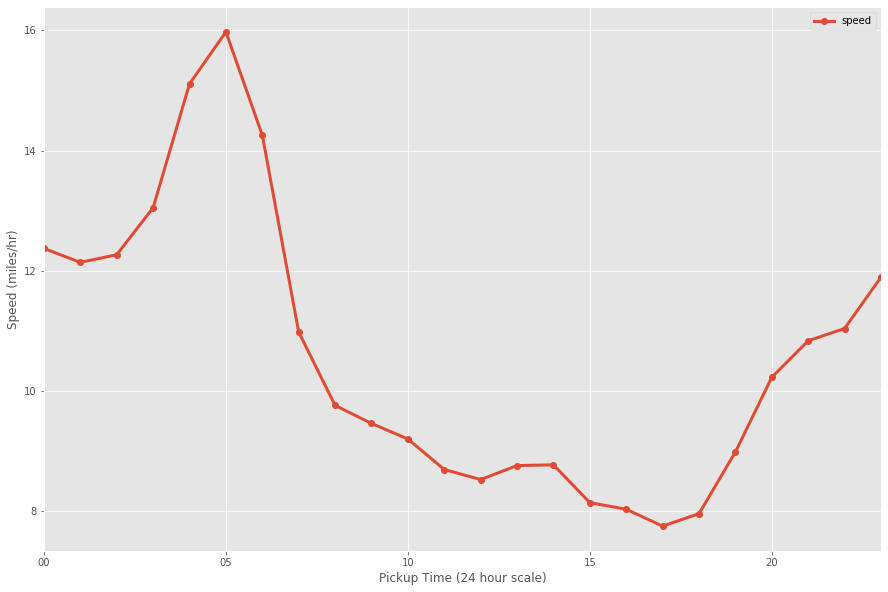

In [16]:
ax = df_filtered_dec1.plot(figsize=(15,10), x='PUtime', y='speed',linewidth=3, style="-o" )
x = range(0,30)
ax.set_xlabel('Pickup Time (24 hour scale)')
ax.set_ylabel('Speed (miles/hr)')
ax.figure.savefig('demo-file.png')

In [17]:
sf = shapefile.Reader("shape/taxi_zones.shp")
fields_name = [field[0] for field in sf.fields[1:]]
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))
attributes = sf.records()
shp_attr = [dict(zip(fields_name, attr)) for attr in attributes]

df_loc = pd.DataFrame(shp_attr).join(get_lat_lon(sf).set_index("LocationID"), on="LocationID")
df_loc.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,longitude,latitude
0,1,0.116357,0.000782,Newark Airport,1,EWR,9.366817e+05,190522.130278
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,1.033536e+06,161853.982300
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,1.027136e+06,254730.010849
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,9.904240e+05,203100.040432
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,9.321332e+05,139954.541936


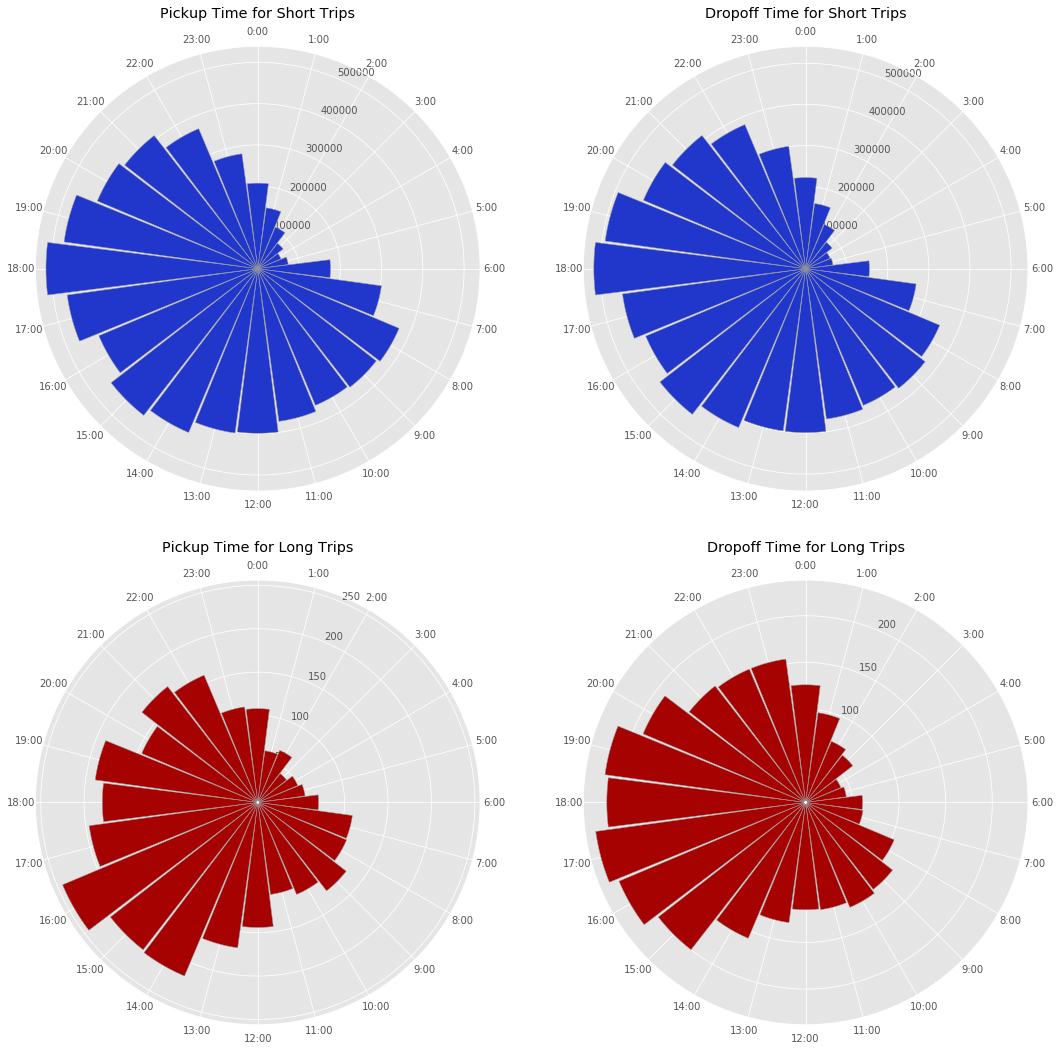

In [28]:
df_q3_short = pd.read_sql_query('SELECT pickup_hour AS PUtime, \
                                 dropoff_hour AS DOtime, count(*) AS count, speed AS speed \
                                 FROM table_record \
                                 WHERE trip_distance < 30 \
                                 GROUP BY pickup_hour, dropoff_hour', nyc_database)

df_q3_long = pd.read_sql_query('SELECT pickup_hour AS PUtime, \
                                 dropoff_hour AS DOtime, count(*) AS count,speed AS speed \
                                 FROM table_record \
                                 WHERE trip_distance >= 30 \
                                 GROUP BY pickup_hour, dropoff_hour', nyc_database)

df_q3 = df_q3_short_speed.merge(df_q3_long, on=["PUtime", "DOtime"], suffixes=["_short", "_long"]) \
                        .rename(columns={"count_short":"short trips", "count_long":"long trips", \
                                        "PUtime":"pickup time", "DOtime":"dropoff time"})

df_q3_PU = df_q3.groupby(["pickup time"], as_index=False) \
            .agg({'short trips': 'sum', 'long trips':'sum'}) \
            .sort_values(by="pickup time")
df_q3_DO = df_q3.groupby(["dropoff time"], as_index=False) \
            .agg({'short trips': 'sum', 'long trips':'sum'}) \
            .sort_values(by="dropoff time")

diff_short_long_trip_on_time()

In [20]:
nyc_speedcheck = create_engine('sqlite:///nyc_speedcheck.db')
df_q3_short_speed.to_sql('Tablecheckspeed', nyc_speedcheck, if_exists='append')
a = pd.read_sql('Tablecheckspeed', 'sqlite:///nyc_speedcheck.db')

In [21]:
a['speed'] = a['speed']/a['count'] #Average speed

In [34]:
df_q3_short = pd.read_sql_query('SELECT PULocationID, DOLocationID, count(*) AS count \
                                 FROM table_record \
                                 WHERE trip_distance < 30 \
                                 GROUP BY PULocationID, DOLocationID', nyc_database)
df_q3_long = pd.read_sql_query('SELECT PULocationID, DOLocationID, count(*) AS count \
                                 FROM table_record \
                                 WHERE trip_distance >= 30 \
                                 GROUP BY PULocationID, DOLocationID', nyc_database)


In [35]:
df_q3 = df_q3_short.merge(df_q3_long, on=["PULocationID", "DOLocationID"], suffixes=["_short", "_long"]) \
                        .rename(columns={"count_short":"short trips", "count_long":"long trips"})
df_q3 = df_q3.merge(df_loc[["LocationID", "zone"]], left_on="PULocationID", right_on="LocationID") \
             .drop(['LocationID'], axis=1).rename(columns={"zone":"pickup zone"}) \
             .merge(df_loc[["LocationID", "zone"]], left_on="DOLocationID", right_on="LocationID") \
             .drop(['LocationID'], axis=1).rename(columns={"zone":"dropoff zone"})


In [40]:

ShortTrip_top3 = df_q3.sort_values(by="short trips", ascending=False).head(5)
ShortTrip_top3[['pickup zone', 'dropoff zone', 'short trips']]


,pickup zone,dropoff zone,short trips
283,Upper East Side North,Upper East Side North,47713
287,Upper West Side South,Upper West Side South,19463
338,Penn Station/Madison Sq West,Midtown Center,18735
306,Upper East Side North,Yorkville West,16441
303,Upper East Side North,Yorkville East,15284


In [39]:
LongTrip_top3 = df_q3.sort_values(by="long trips", ascending=False).head(5)
LongTrip_top3[['pickup zone', 'dropoff zone', 'long trips']]


,pickup zone,dropoff zone,long trips
3,JFK Airport,Newark Airport,272
32,JFK Airport,JFK Airport,67
4,LaGuardia Airport,Newark Airport,48
37,Meatpacking/West Village West,JFK Airport,31
138,Murray Hill,Eltingville/Annadale/Prince's Bay,19


In [275]:
LongTrip_top3 = df_q3.sort_values(by="long trips", ascending=False).head(5)

LongTrip_top3[['pickup zone', 'dropoff zone', 'long trips']]


,pickup zone,dropoff zone,long trips
1,JFK Airport,Newark Airport,272
16,JFK Airport,JFK Airport,67
19,Meatpacking/West Village West,JFK Airport,31
3,Midtown North,Newark Airport,9
7,Battery Park City,JFK Airport,9
